# FingerPrint Classification
__Author__ : Mohammad Rouintan , 400222042

__Course__ : Undergraduate Digital Image Processing Course

In [431]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize
import glob
import os

In [432]:
path = '/Users/mohammad/Downloads/NISTSpecialDatabase4GrayScaleImagesofFIGS/sd04/png_txt'
imgs = glob.glob(path + '/**/*.png', recursive=True)
txts = glob.glob(path + '/**/*.txt', recursive=True)

This code performs pre-processing on an input grayscale image to prepare it for further analysis or processing. 

The `pre_process` function takes in the filename of an input image, reads it in grayscale using `cv2.imread`, and applies a Gaussian blur with a kernel size of 7x7 using `cv2.GaussianBlur`. This smoothing operation helps to reduce noise and small details in the image.

The function then converts the smoothed image to binary using `cv2.adaptiveThreshold` with a Gaussian adaptive thresholding method. This converts the grayscale image to a binary image where pixels are either 0 or 255 based on whether they are below or above a threshold value, which is determined locally for each pixel based on the surrounding pixels.

The binary image is further pre-processed using morphological operations to remove small objects and fill in gaps. First, a 3x3 square structuring element is defined and used to perform an opening operation (`cv2.morphologyEx`) on the binary image. This removes small objects and smooths the edges of larger objects. The resulting image is then subjected to a closing operation using the same structuring element, which fills in gaps and smooths the edges further.

Finally, a circular structuring element with a radius of 3 pixels is defined using `cv2.getStructuringElement`, and another opening operation is performed on the processed image using this element. This operation helps to further smooth the edges of objects and remove small details.

The function returns the pre-processed binary image as output.

In [433]:
def pre_process(img):
    # Read Image
    img_gray = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    img_gray = cv2.GaussianBlur(img_gray, (7, 7), 0)

    # Convert To Binary
    img_binary = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 13, 4)
    
    # Morphological preprocess
    B = np.ones((3, 3), np.uint8)
    img_morph = cv2.morphologyEx(cv2.morphologyEx(img_binary, cv2.MORPH_OPEN, B), cv2.MORPH_CLOSE, B)


    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    processed_image = cv2.morphologyEx(img_morph, cv2.MORPH_OPEN, kernel)

    return processed_image

In [434]:
p_imgs = []
for i in range(len(imgs)):
    img = pre_process(imgs[i])
    p_imgs.append(img)

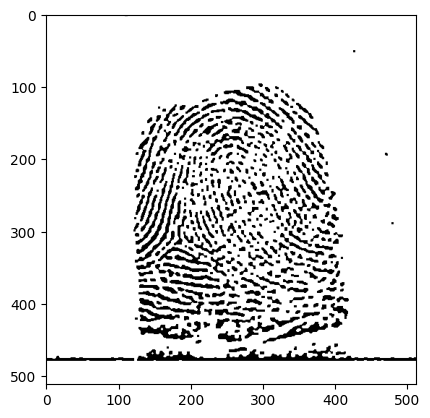

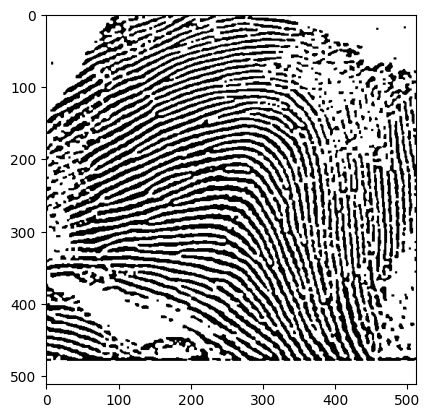

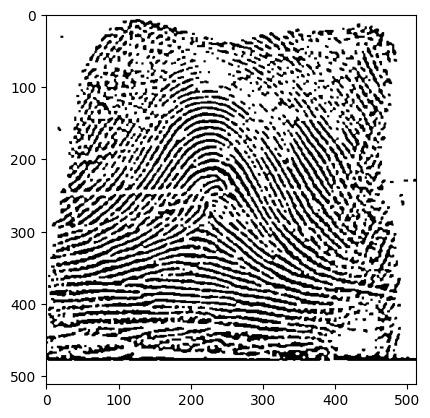

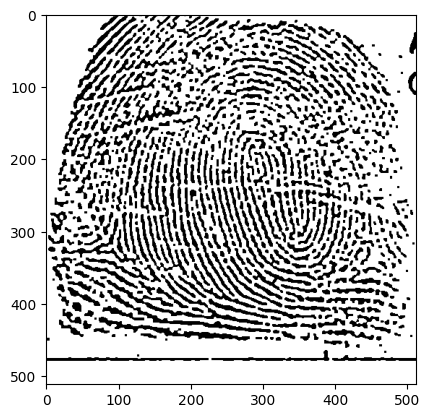

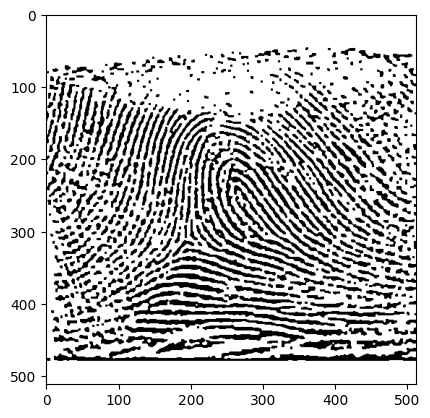

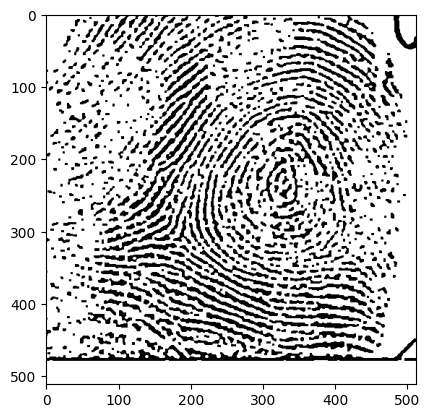

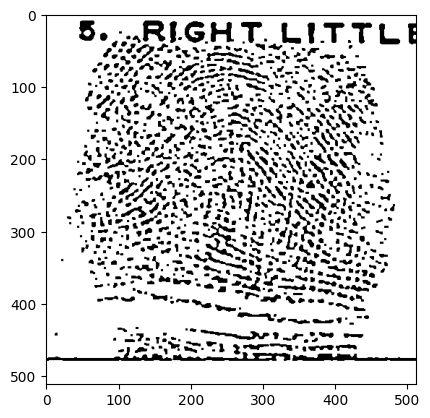

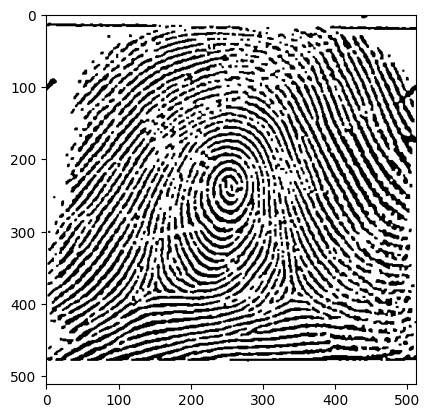

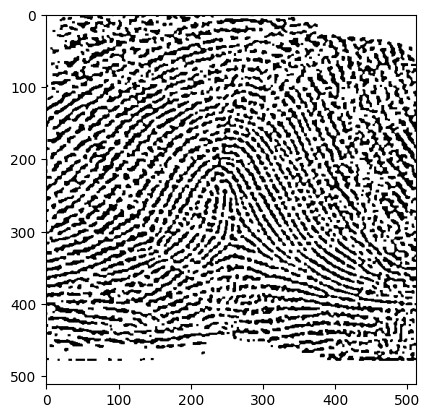

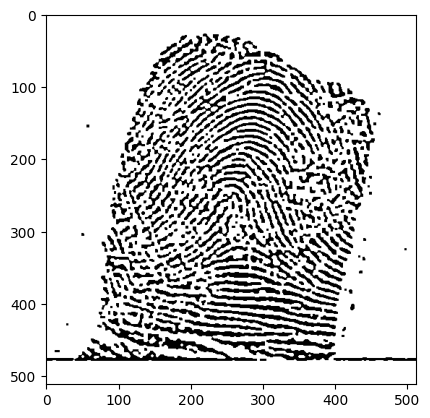

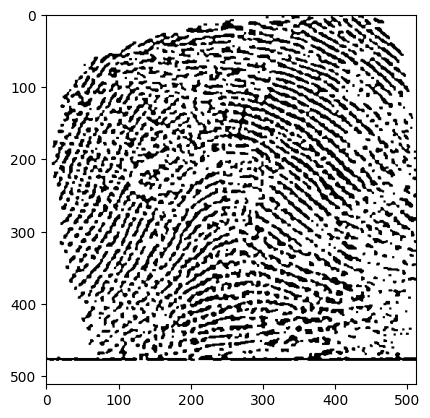

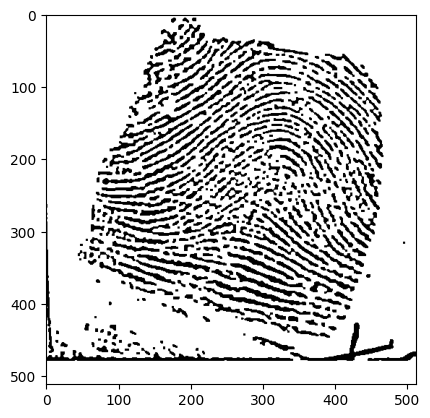

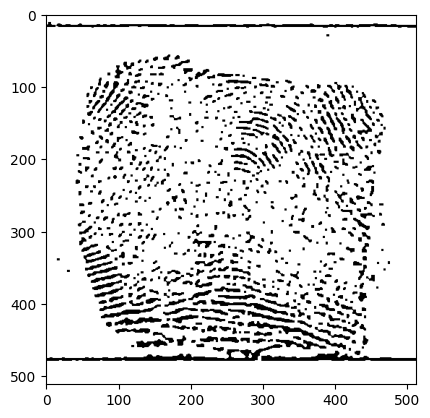

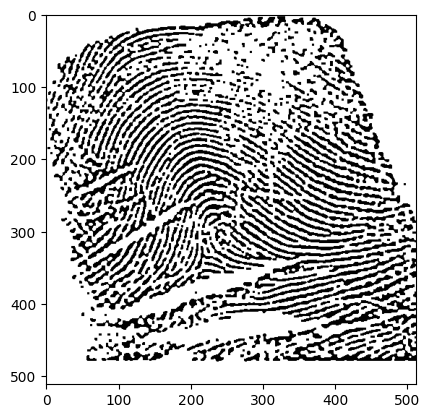

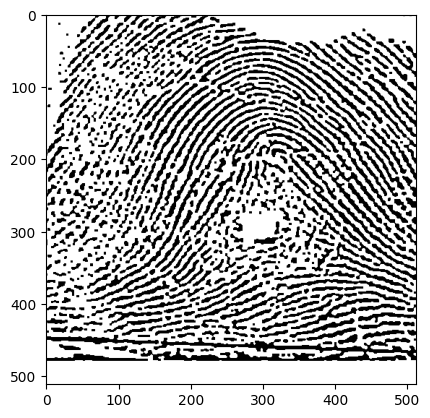

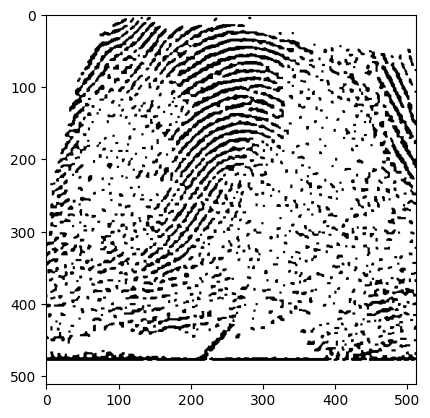

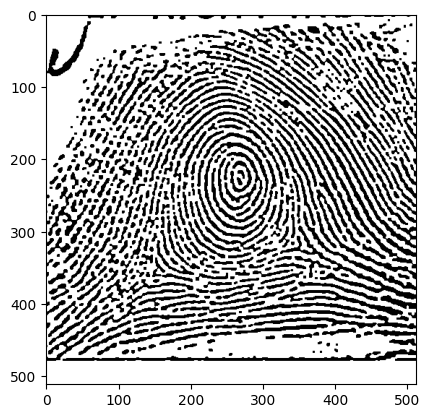

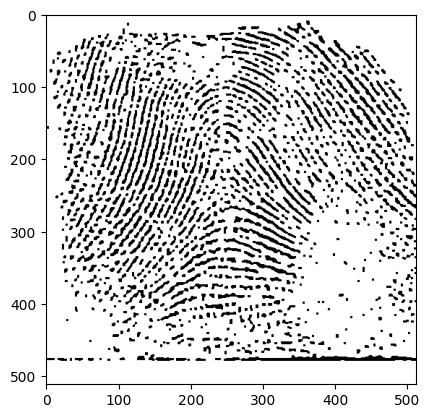

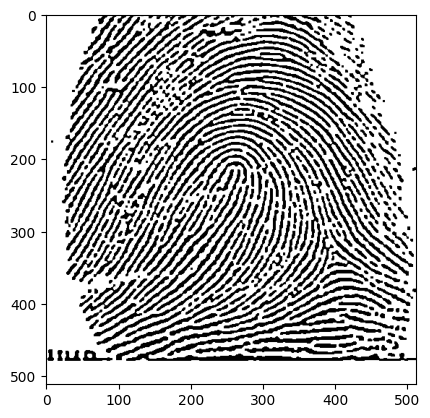

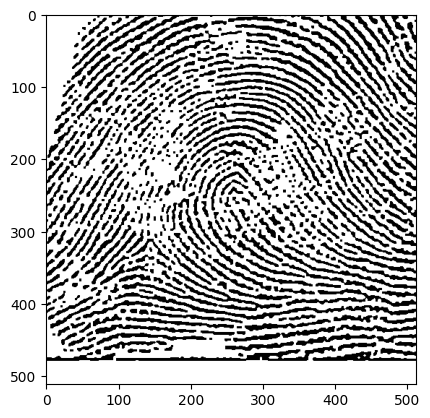

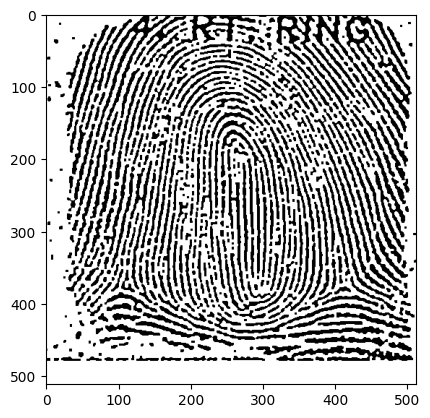

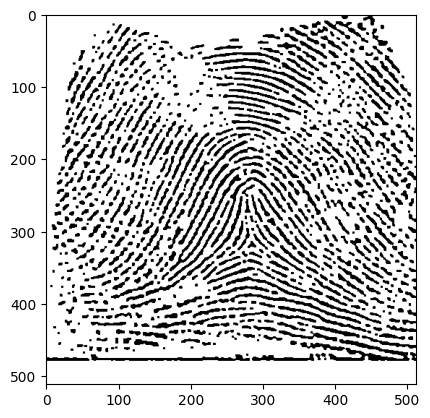

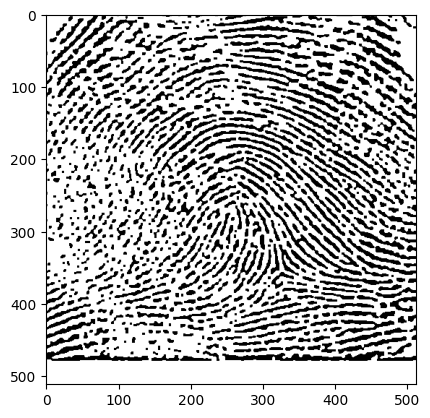

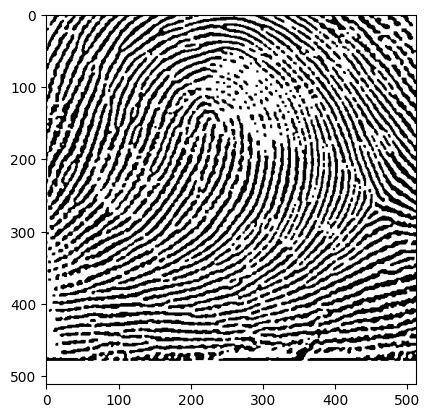

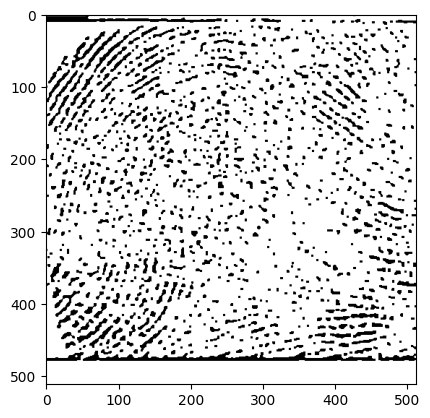

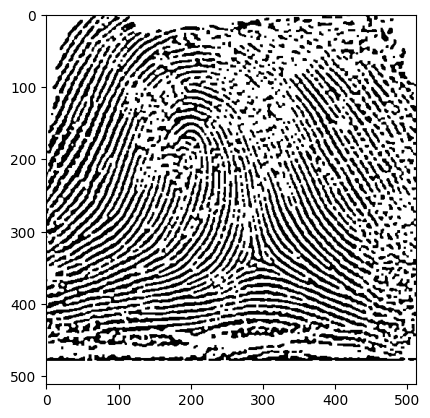

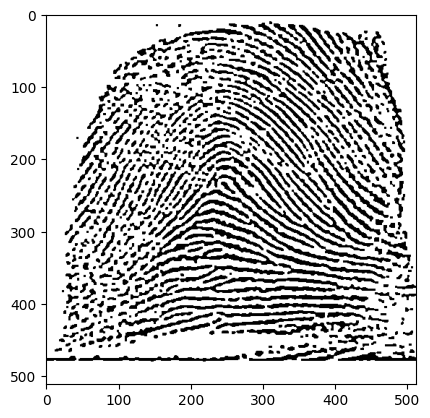

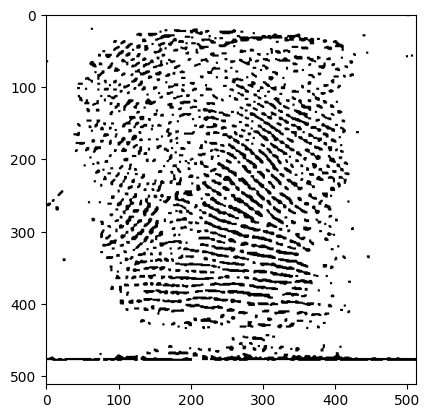

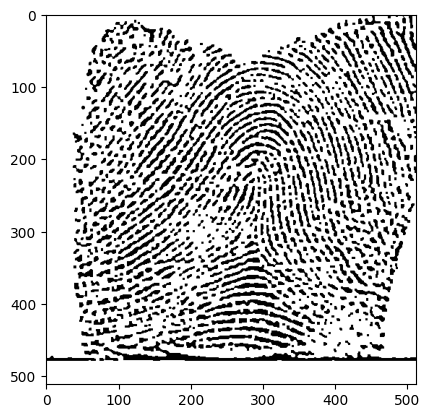

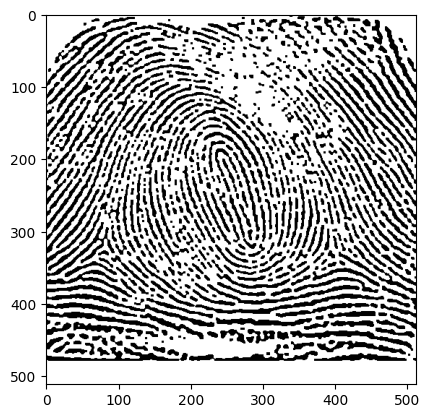

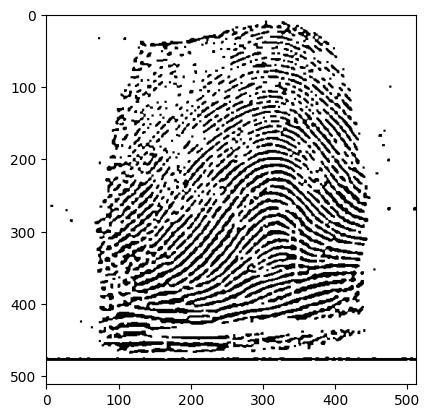

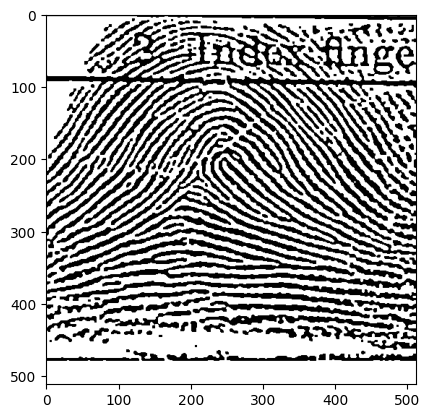

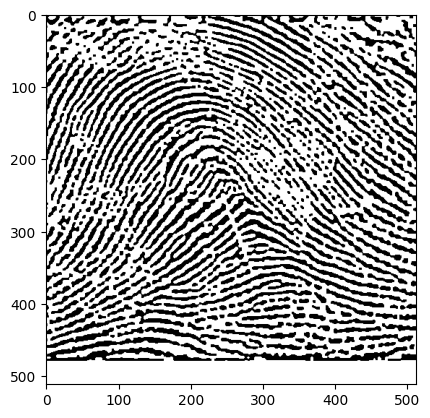

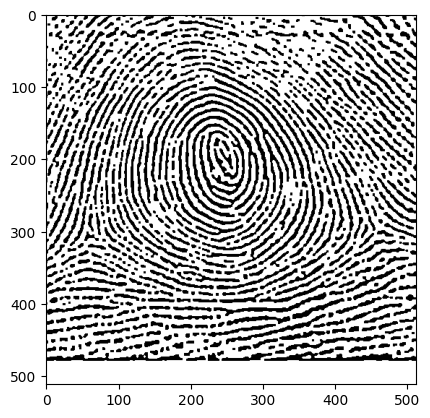

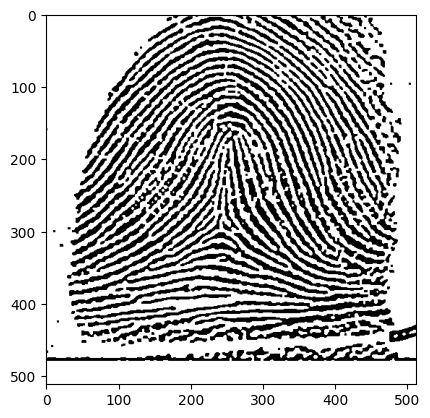

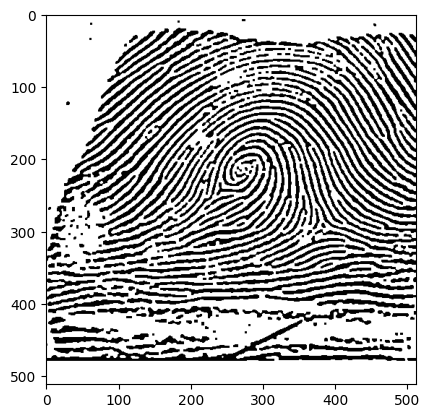

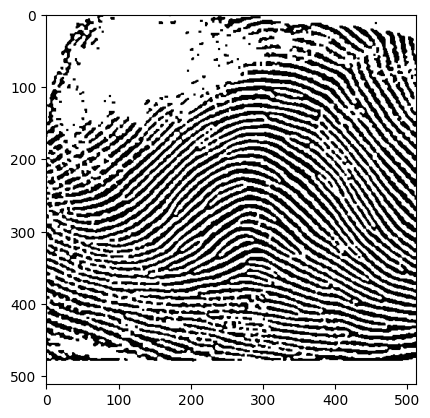

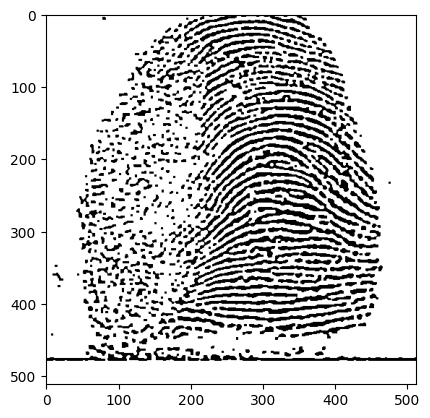

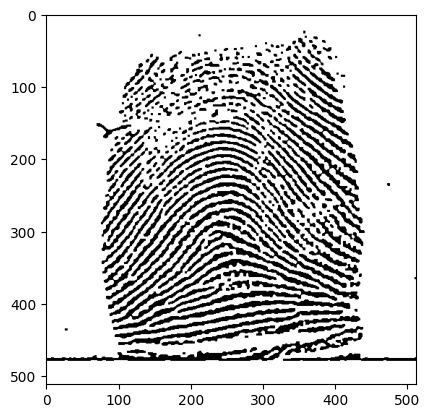

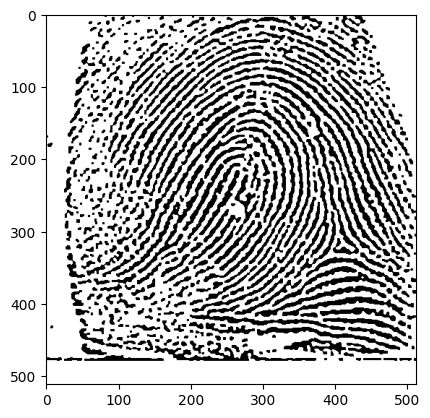

In [435]:
### preprocessed image
for i in range(0, len(p_imgs), 100):
    plt.imshow(p_imgs[i], cmap='gray')
    plt.show()

This code reads in a set of text files containing character labels for a collection of fingerprint images, and selects a subset of images for each of five different fingerprint pattern types: arches, tented arches, left loops, right loops, and whorls.

In [425]:
archs, tented_archs, left_loops, right_loops, whorls = [], [], [], [], []
for i in range(1000, len(txts)-1000):
    f = open(txts[i], 'r')
    f.readline()
    char = f.readline()[-2]
    if char == 'A' and len(archs) < 20:
        archs.append(p_imgs[i])
    elif char == 'T' and len(tented_archs) < 20:
        tented_archs.append(p_imgs[i])
    elif char == 'L' and len(left_loops) < 20:
        left_loops.append(p_imgs[i])
    elif char == 'R' and len(right_loops) < 20:
        right_loops.append(p_imgs[i])
    elif char == 'W' and len(whorls) < 20:
        whorls.append(p_imgs[i])

This code calculates the gradient of an input grayscale image and displays it as a quiver plot.

The `find_gradient` function takes in an input image, resizes it to a 120x120 pixel image using `cv2.resize`, and calculates the x and y gradients of the image using the Sobel operator implemented in `cv2.Sobel`. The resulting x and y gradient images are stored in gx and gy, respectively.

The function then creates a quiver plot using plt.quiver, which displays the gradient vectors as arrows on top of the input image. The quiver function takes in the x and y coordinates of the arrows (range(img.shape[0]) and range(img.shape[1]), respectively), as well as the x and y components of the gradient vectors (gx and gy, respectively). The arrows are colored red using the color argument.

The purpose of this code is likely to visualize the gradient of an input image, which can be useful for understanding the local changes in intensity or texture within the image. The quiver plot provides a visual representation of the direction and magnitude of the gradient vectors at each pixel location.

In [440]:
def find_gradient(img):
    img = cv2.resize(img, (120, 120))

    gx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)
    gy = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT) 
    
    plt.figure(figsize=(20, 10))
    plt.imshow(img, cmap='gray')
    plt.quiver(range(img.shape[0]), range(img.shape[1]), gx, gy, color='red')
    plt.show()

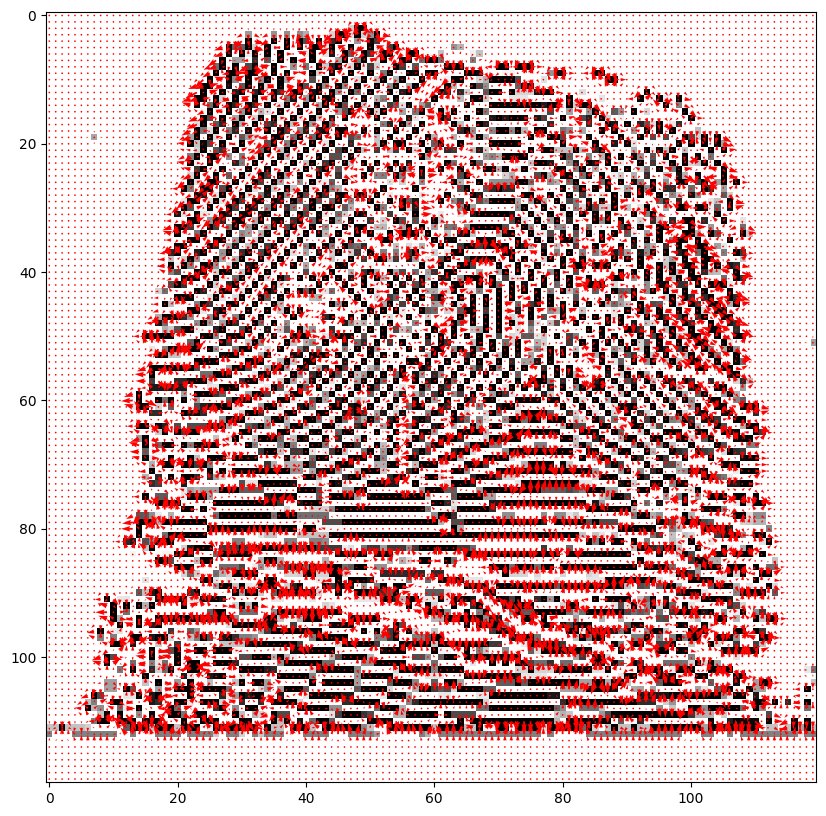

In [441]:
find_gradient(p_imgs[20])

This code computes Histogram of Oriented Gradients (HOG) features for an input grayscale image using the `hog` function from the `skimage.feature` module. 

The `get_hog` function takes in an input grayscale image and computes its HOG features using the `hog` function. The HOG features are computed using the following parameters:

- `orientations`: The number of orientation bins in the histogram. In this case, `orientations` is set to 9, which means that the gradient orientations will be divided into 9 equally spaced bins.
- `pixels_per_cell`: The size of the cell in pixels used to compute the histogram. In this case, each cell is 8x8 pixels in size.
- `cells_per_block`: The number of cells per block used to normalize the histogram. In this case, each block is 2x2 cells in size.
- `block_norm`: The method used to normalize the histogram within each block. In this case, the L2-Hys normalization method is used.

The resulting HOG features are stored in the `hog_features` variable and returned as output.

HOG is a popular feature extraction method for object detection and recognition tasks in computer vision. It works by computing local gradient orientation histograms for small regions of an image and concatenating them into a feature vector that describes the overall texture and shape of the image.

In [442]:
from skimage.feature import hog
def get_hog(img):
    hog_features = hog(img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys')
    return hog_features

In [443]:
h_imgs = []
for img in p_imgs:
    h_imgs.append(get_hog(img))

This code computes the HOG features for a set of fingerprint images belonging to different fingerprint pattern types, namely arches, tented arches, left loops, right loops, and whorls.

In [444]:
h_archs = [get_hog(item) for item in archs]
h_tented_archs = [get_hog(item) for item in tented_archs]
h_left_loops = [get_hog(item) for item in left_loops]
h_right_loops = [get_hog(item) for item in right_loops]
h_whorls = [get_hog(item) for item in whorls]

In [445]:
from scipy.spatial import distance

This code implements a simple classifier to determine the fingerprint pattern type of an input fingerprint image based on its similarity to a set of reference images with known pattern types. The classifier uses cosine distance to measure the similarity between the input image and each reference image, and assigns the pattern type corresponding to the most similar reference image as the output category.

The `classifier` function takes in an input image `img` and compares it to a set of reference images for each fingerprint pattern type (`archs`, `tented_archs`, `left_loops`, `right_loops`, and `whorls`) that have been preprocessed to extract their HOG features and stored in separate lists (`h_archs`, `h_tented_archs`, `h_left_loops`, `h_right_loops`, and `h_whorls`).

Within the function, the cosine distance between the input image and each reference image is computed using `distance.cosine` function from the `scipy.spatial` module. The cosine distance is subtracted from 1 to obtain a similarity measure between the images. The maximum similarity score and corresponding pattern type are updated whenever a higher similarity score is found.

The function returns the pattern type with the highest similarity score as the output category.

The purpose of this code is likely to classify an input fingerprint image into one of the five fingerprint pattern types (`A`, `T`, `L`, `R`, `W`) based on its similarity to a set of reference images. This classifier can be used as a component of a larger fingerprint recognition or classification system.

In [446]:
def classifier(img):
    maximum = 0
    category = None

    for arch in h_archs:
        similarity = 1 - distance.cosine(img, arch)
        if similarity >= maximum:
            maximum = similarity
            category = 'A'

    for tented_arch in h_tented_archs:
        similarity = 1 - distance.cosine(img, tented_arch)
        if similarity >= maximum:
            maximum = similarity
            category = 'T'


    for left_loop in h_left_loops:
        similarity = 1 - distance.cosine(img, left_loop)
        if similarity >= maximum:
            maximum = similarity
            category = 'L'

    for right_loop in h_right_loops:
        similarity = 1 - distance.cosine(img, right_loop)
        if similarity >= maximum:
            maximum = similarity
            category = 'R'

    for whorl in h_whorls:
        similarity = 1 - distance.cosine(img, whorl)
        if similarity >= maximum:
            maximum = similarity
            category = 'W'

    return category

This code applies the classifier function to each image in a set of preprocessed fingerprint images (h_imgs) and stores the resulting pattern type labels in a list (labels).

Once the loop has completed, the labels list contains the predicted pattern type label for each input fingerprint image.

The purpose of this code is likely to apply the classifier to a set of preprocessed fingerprint images and generate a list of predicted pattern type labels. This list of labels can be used to evaluate the performance of the classifier and/or as input to a downstream fingerprint recognition or classification system.

In [447]:
labels = []
for img in h_imgs:
    labels.append(classifier(img))

This code reads the true fingerprint pattern type labels for a set of fingerprint images from a set of text files, where each file contains the label for a single image.

Once the loop has completed, the true_labels list contains the true pattern type label for each fingerprint image.

The purpose of this code is likely to read the true pattern type labels for a set of fingerprint images from text files. These true labels can be used to evaluate the accuracy of a classifier or other fingerprint recognition or classification system.

In [448]:
true_labels = []
for txt in txts:
    f = open(txt, 'r')
    f.readline()
    true_labels.append(f.readline()[-2])

This code computes the accuracy of a fingerprint pattern type classifier by comparing the predicted pattern type labels generated by the classifier (labels) to the true pattern type labels read from text files (true_labels), and reporting the percentage of correct predictions.

In [449]:
acc = 0
for i in range(4000):
    if labels[i] == true_labels[i]:
        acc += 1

print(acc/4000 * 100)

22.2
